<a href="https://colab.research.google.com/github/TZS3138/your-repo/blob/main/03_Evaluation_and_Explainability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!nvidia-smi

Wed Dec 31 13:12:24 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124
!pip install numpy matplotlib seaborn panda scikit-learn

Looking in indexes: https://download.pytorch.org/whl/cu124
  Preparing metadata (setup.py) ... done
  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7239 sha256=26b8799adf24471728efb7a6066074f3b782856b61a7ed1bbb0700edd260e4cd
  Stored in directory: /root/.cache/pip/wheels/98/41/5b/6ca54e0b6a35e1b7248c12f56fcb753dfb7717fefaa0fb45f5
Successfully built panda


**Part 3**

1. Quantitative Metrics

In [5]:
import os
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

Report: Accuracy, Precision, Recall, F1-score


Accuracy  Precision  Recall  F1-score
Class 1      0.8500     0.2394  0.8500    0.3736
Class 2      1.0000     0.9756  1.0000    0.9877
Class 3      0.2000     0.4000  0.2000    0.2667
Class 4      0.2222     0.5000  0.2222    0.3077
Class 5      0.7333     0.8462  0.7333    0.7857
Class 6      1.0000     0.7353  1.0000    0.8475
Class 7      0.7000     0.5833  0.7000    0.6364
Class 8      1.0000     0.6771  1.0000    0.8075
Class 9      0.8077     0.4884  0.8077    0.6087
Class 10     0.9600     0.8276  0.9600    0.8889
Class 11     0.4627     0.7561  0.4627    0.5741
Class 12     0.7761     1.0000  0.7761    0.8739
Class 13     1.0000     0.8788  1.0000    0.9355
Class 14     0.8929     0.9259  0.8929    0.9091
Class 15     0.9655     0.5957  0.9655    0.7368
Class 16     0.8571     0.3462  0.8571    0.4932
Class 17     0.8308     0.9153  0.8308    0.8710
Class 18     0.7097     0.5641  0.7097    0.6286
Class 19     0.7586     0.5789  0.7586    0.6567
Class 20     0.7500     0.8182  0.7500    0.7826
Class 21     0.7500     0.4054  0.7500    0.5263
Class 22     0.8462     0.7021  0.8462    0.7674
Class 23     0.8451     0.9375  0.8451    0.8889
Class 24     0.8182     0.4615  0.8182    0.5902
Class 25     0.9524     0.6897  0.9524    0.8000
Class 26     0.8571     0.5625  0.8571    0.6792
Class 27     0.9000     1.0000  0.9000    0.9474
Class 28     0.8043     0.8222  0.8043    0.8132
Class 29     0.9138     0.9138  0.9138    0.9138
Class 30     0.5538     0.8780  0.5538    0.6792
Class 31     0.5625     0.8182  0.5625    0.6667
Class 32     0.3600     0.6923  0.3600    0.4737
Class 33     1.0000     0.6667  1.0000    0.8000
Class 34     0.6500     0.6500  0.6500    0.6500
Class 35     0.9130     0.9545  0.9130    0.9333
Class 36     0.4000     1.0000  0.4000    0.5714
Class 37     0.9886     0.7632  0.9886    0.8614
Class 38     0.8333     0.9677  0.8333    0.8955
Class 39     0.1905     0.1739  0.1905    0.1818
Class 40     0.5745     0.7941  0.5745    0.6667
Class 41     0.8318     0.8900  0.8318    0.8599
Class 42     0.7436     0.7073  0.7436    0.7250
Class 43     0.3636     0.8696  0.3636    0.5128
Class 44     0.9863     0.3830  0.9863    0.5517
Class 45     0.8500     0.7727  0.8500    0.8095
Class 46     0.8011     0.8103  0.8011    0.8057
Class 47     0.9787     0.9583  0.9787    0.9684
Class 48     0.8039     0.7885  0.8039    0.7961
Class 49     1.0000     0.8056  1.0000    0.8923
Class 50     0.9306     0.8481  0.9306    0.8874
Class 51     0.3866     0.9200  0.3866    0.5444
Class 52     0.8615     0.9333  0.8615    0.8960
Class 53     0.4521     0.7857  0.4521    0.5739
Class 54     0.7317     0.9375  0.7317    0.8219
Class 55     0.9608     0.6049  0.9608    0.7424
Class 56     0.9775     0.7131  0.9775    0.8246
Class 57     0.9149     0.6056  0.9149    0.7288
Class 58     0.9894     0.8455  0.9894    0.9118
Class 59     0.9574     0.9000  0.9574    0.9278
Class 60     0.9775     0.7909  0.9775    0.8744
Class 61     1.0000     0.7895  1.0000    0.8824
Class 62     0.4000     0.7368  0.4000    0.5185
Class 63     1.0000     0.8293  1.0000    0.9067
Class 64     1.0000     0.8649  1.0000    0.9275
Class 65     0.9512     0.7723  0.9512    0.8525
Class 66     1.0000     0.5857  1.0000    0.7387
Class 67     0.7273     0.5517  0.7273    0.6275
Class 68     0.5294     0.8571  0.5294    0.6545
Class 69     1.0000     0.9189  1.0000    0.9577
Class 70     0.9286     0.9512  0.9286    0.9398
Class 71     1.0000     0.7945  1.0000    0.8855
Class 72     0.6053     0.6479  0.6053    0.6259
Class 73     0.8218     0.8938  0.8218    0.8563
Class 74     0.3510     0.9298  0.3510    0.5096
Class 75     0.8800     0.8800  0.8800    0.8800
Class 76     0.7931     0.7188  0.7931    0.7541
Class 77     0.9610     0.9447  0.9610    0.9528
Class 78     0.7863     0.6093  0.7863    0.6866
Class 79     0.7619     0.7619  0.7619    0.7619
Class 80     0.8588     0.7935  0.8588    0.8249
Class 81     0.9452     0.9857  0.9452    


Overall Performance Summary
          Metric  F1-Score
        Accuracy    0.7445
   Macro Average    0.7265
Weighted Average    0.7356



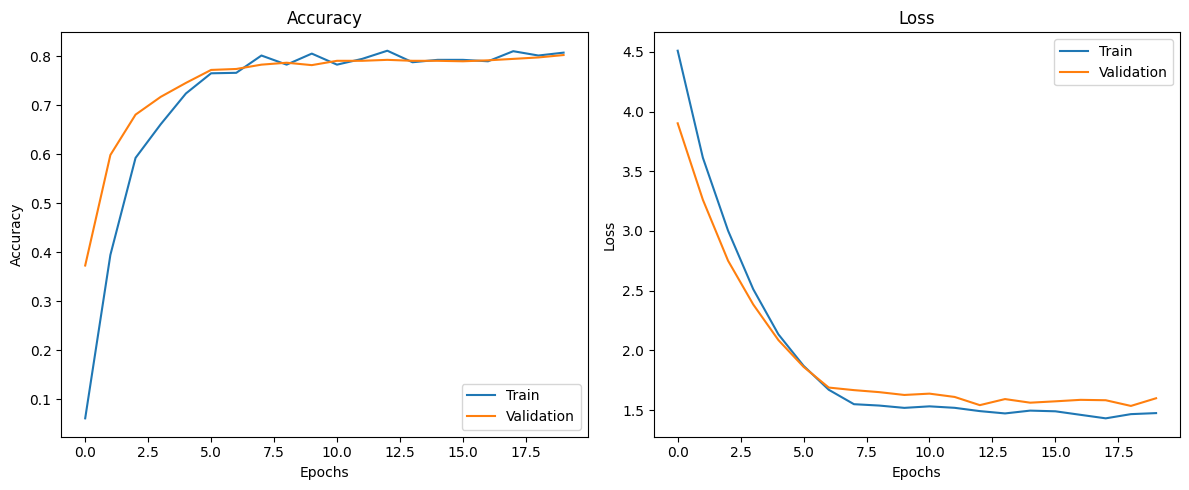

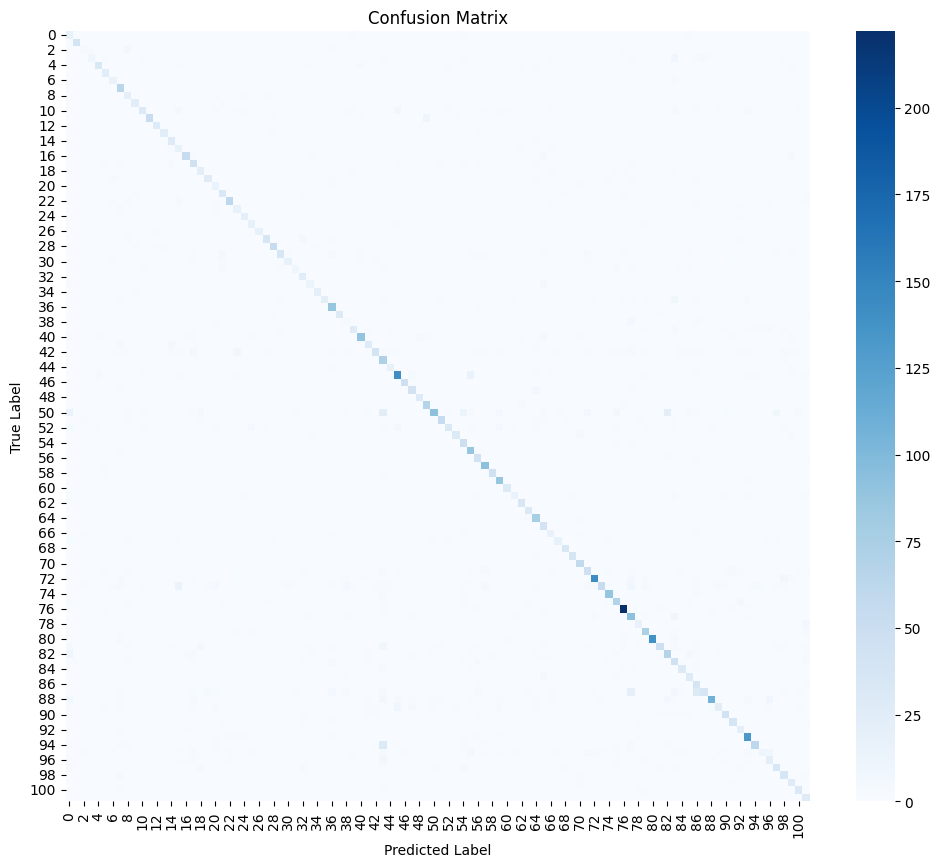


Top 10 Most Confused Class Pairs
 True Class  Predicted Class  Count
         95               44     30
         88               87     30
         51               44     24
         51               83     23
         88               78     20
         51                1     15
         74               16     14
         46               56     14
         51               55     13
         12               50     11




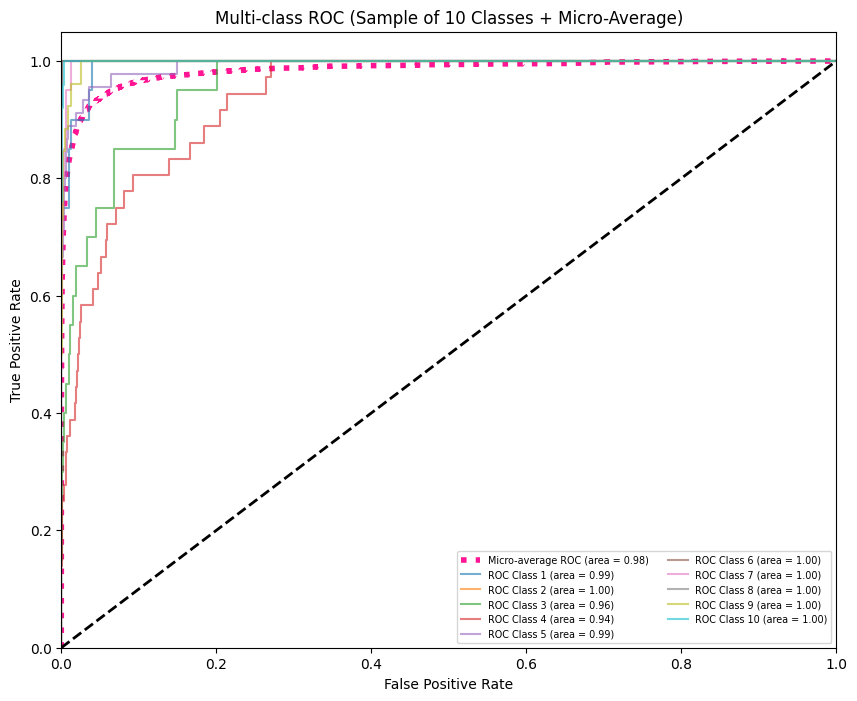

In [6]:
# Load Data
base_path = '/content/'

with open(os.path.join(base_path, 'training_history.json'), 'r') as f:
    history = json.load(f)

with open(os.path.join(base_path, 'eval_results.pkl'), 'rb') as f:
    eval_data = pickle.load(f)

y_true = np.array(eval_data['y_true'])
y_pred = np.array(eval_data['y_pred'])
y_probs = np.array(eval_data['y_probs'])

# Class Names (1-102)
n_classes = 102
class_names = [f"Class {i+1}" for i in range(n_classes)]

# Report: Accuracy, Precision, Recall, F1-score (macro & weighted)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, labels=range(n_classes))

cm = confusion_matrix(y_true, y_pred, labels=range(n_classes))
class_accuracy = cm.diagonal() / cm.sum(axis=1)

# Create DataFrame
metrics_df = pd.DataFrame({
    'Accuracy': class_accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
}, index=class_names)

# Prevents Colab/Pandas from minimizing the middle rows
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.4f}'.format)

print("Report: Accuracy, Precision, Recall, F1-score")
display(metrics_df)

# Reset options back to default after printing so other tables don't explode in size
pd.reset_option('display.max_rows')

# Overall Summary (Macro & Weighted)
print("\nOverall Performance Summary")
overall_report = classification_report(y_true, y_pred, output_dict=True)
summary_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Macro Average', 'Weighted Average'],
    'F1-Score': [overall_report['accuracy'], overall_report['macro avg']['f1-score'], overall_report['weighted avg']['f1-score']]
})
print(summary_df.to_string(index=False) + "\n")

# Training History Visualization for LR=0.001
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_acc'], label='Train')
plt.plot(history['val_acc'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_loss'], label='Train')
plt.plot(history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend()
plt.tight_layout()
plt.show()

print("\n")

# Confusion Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label'); plt.ylabel('True Label')
plt.show()

confusions = []
for i in range(len(cm)):
    for j in range(len(cm)):
        if i != j and cm[i, j] > 0:
            confusions.append({
                'True Class': i + 1,
                'Predicted Class': j + 1,
                'Count': cm[i, j]
            })

# Convert to DataFrame and sort by the number of errors
confusions_df = pd.DataFrame(confusions).sort_values(by='Count', ascending=False)

print("\nTop 10 Most Confused Class Pairs")
print(confusions_df.head(10).to_string(index=False))

print("\n")

# ROC Curves for Multi-class Classification (With Micro-Average)
y_true_bin = label_binarize(y_true, classes=range(n_classes))

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_true_bin.ravel(), y_probs.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

plt.figure(figsize=(10, 8))

# Micro-average - Represents all 102 classes
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average ROC (area = {roc_auc_micro:0.2f})',
         color='deeppink', linestyle=':', linewidth=4)

# Plot sample of 10 individual classes for visual reference
for i in range(10):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC {class_names[i]} (area = {roc_auc:.2f})', alpha=0.6)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC (Sample of 10 Classes + Micro-Average)')
plt.legend(loc="lower right", fontsize='x-small', ncol=2)
plt.show()

From the "Report: Accuracy, Precision, Recall, F1-score" table, the model has difficulty clearly distinguishing certain flower classes, leading to both missed detections and incorrect predictions. For example, Class 96 (14% recall) and Class 39 (19% recall) are almost never identified, indicating they are frequently misclassified as visually dominant classes. In the other hand, Class 1 (24% precision) is heavily over-predicted, meaning many other flowers are incorrectly labeled as this class.

The confusion matrix shows strong overall performance, but errors are concentrated among a few visually similar classes. From the table, Class 95 is misclassified as Class 44, and Class 88 is misclassified as Class 87. Both have the highest miclasssified times of 30. Moreover, Class 51 appears in multiple high-confusion pairs. This confirmed the unclear decision boundaries for this class. These patterns suggest the model's mistakes are systematic rather than random and could be reduced with better class separation or targeted data improvements.

2. Error Analysis

In [7]:
import torch
import torchvision
from torchvision import datasets, transforms
import pandas as pd

100%|██████████| 345M/345M [00:13<00:00, 25.7MB/s]
100%|██████████| 502/502 [00:00<00:00, 1.83MB/s]
100%|██████████| 15.0k/15.0k [00:00<00:00, 46.6MB/s]


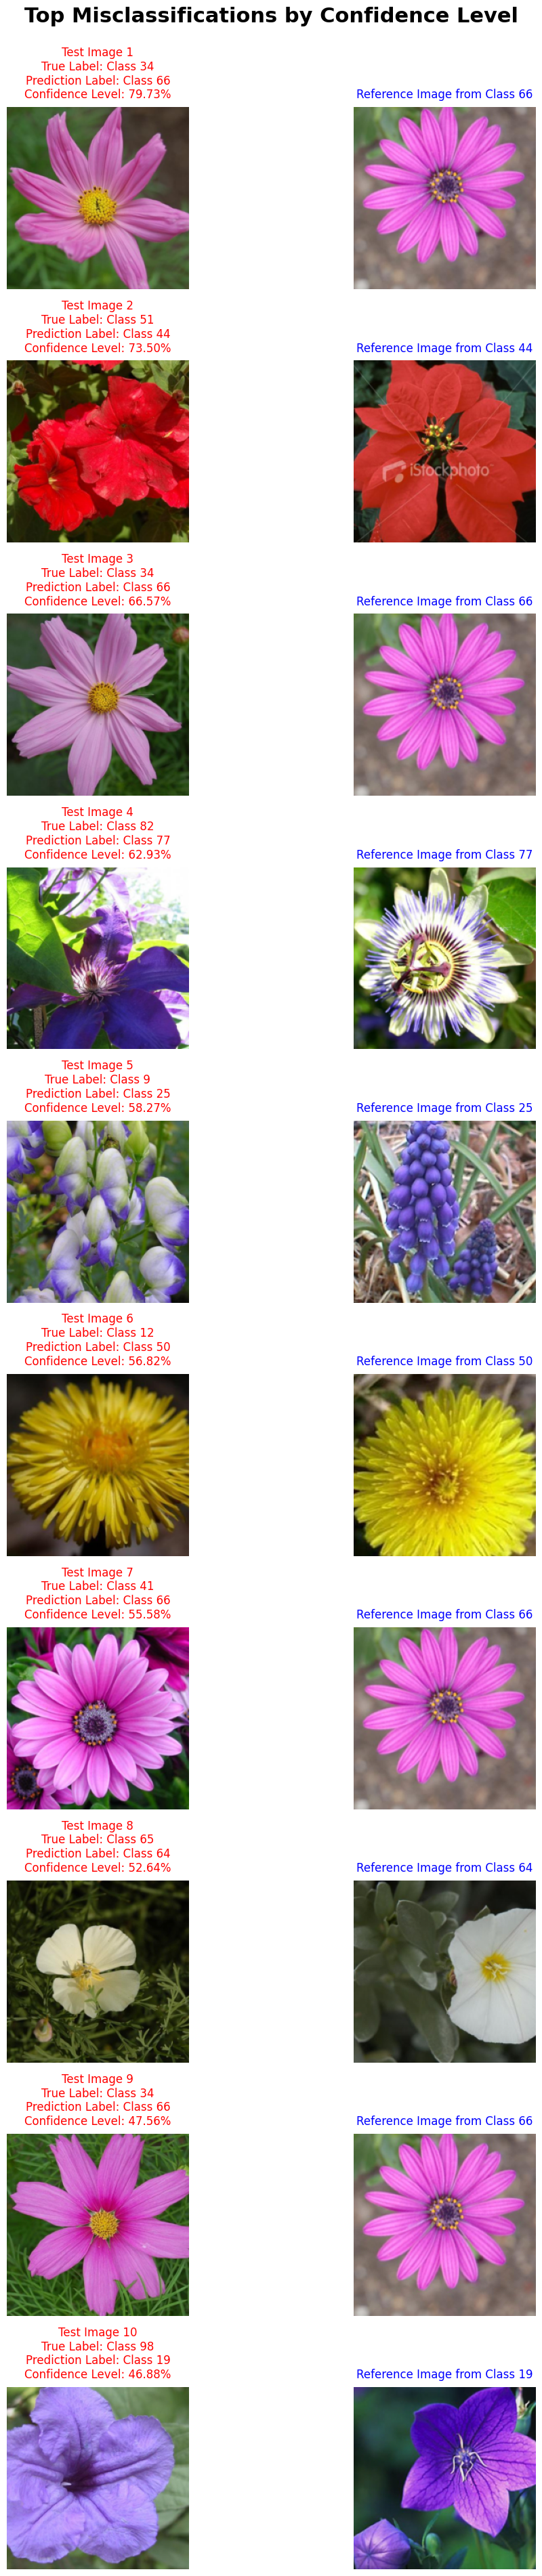

In [8]:
# Validation & Test Augmentations
val_test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
])

test_dataset = datasets.Flowers102(root='./data', split='test', download=True, transform=val_test_transforms)

# Load Evaluation Results
with open('eval_results.pkl', 'rb') as f:
    eval_data = pickle.load(f)

y_true = np.array(eval_data['y_true'])
y_pred = np.array(eval_data['y_pred'])
y_probs = np.array(eval_data['y_probs'])

# Create a Reference Library
class_examples = {}
for idx in range(len(test_dataset)):
    _, label = test_dataset[idx]
    if label not in class_examples:
        class_examples[label] = idx
    if len(class_examples) == 102:
        break

# Identify Top 10 Misclassification by Confidence Level
misclassified_indices = np.where(y_pred != y_true)[0]
wrong_confidences = [y_probs[i][y_pred[i]] for i in misclassified_indices]
# Sort and pick the top 10 highest confidence errors
top_error_indices = misclassified_indices[np.argsort(wrong_confidences)[-10:]]

# Visualization
fig, axes = plt.subplots(10, 2, figsize=(12, 40))

# Title
fig.suptitle("Top Misclassifications by Confidence Level", fontsize=22, y=0.98, fontweight='bold')

# Iterate through the top errors (reversed to show highest confidence first)
for i, idx in enumerate(reversed(top_error_indices)):
    # Misclassified Image from the Test Set
    img_mis, _ = test_dataset[idx]
    true_label = y_true[idx]
    pred_label = y_pred[idx]
    conf = y_probs[idx][pred_label] * 100

    axes[i, 0].imshow(img_mis)
    axes[i, 0].set_title(f"Test Image {i+1}\nTrue Label: Class {true_label+1}\nPrediction Label: Class {pred_label+1}\nConfidence Level: {conf:.2f}%", color='red', fontsize=12, pad=10)
    axes[i, 0].axis('off')

    # Reference Image of the Predicted Class
    ref_idx = class_examples[pred_label]
    img_ref, _ = test_dataset[ref_idx]

    axes[i, 1].imshow(img_ref)
    axes[i, 1].set_title(f"Reference Image from Class {pred_label+1}", color='blue', fontsize=12, pad=10)
    axes[i, 1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

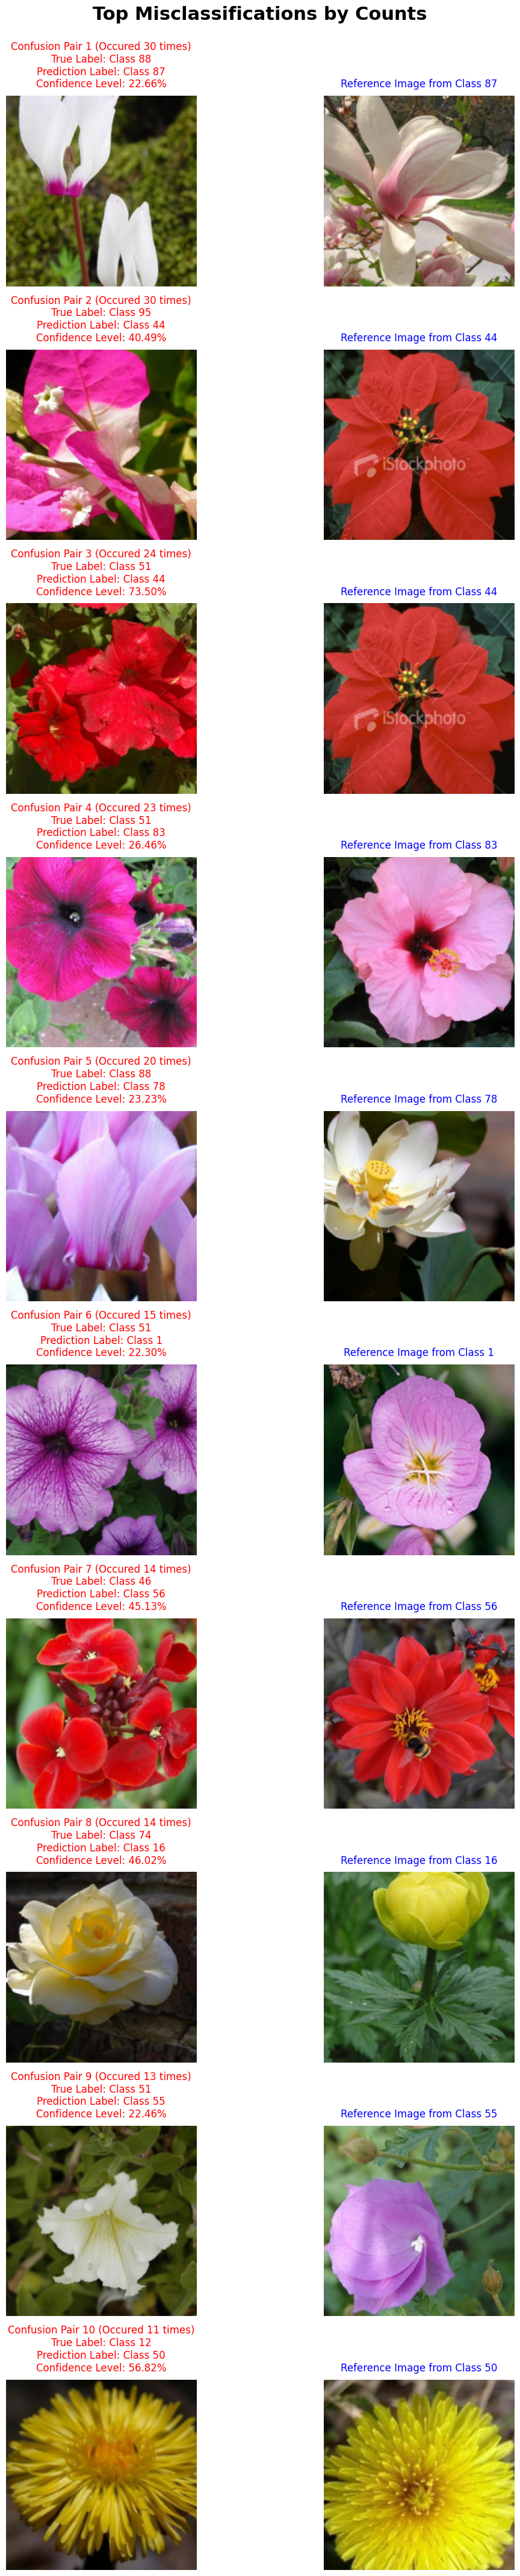

In [9]:
# Validation & Test Augmentations
val_test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
])

test_dataset = datasets.Flowers102(root='./data', split='test', download=True, transform=val_test_transforms)

# Load Evaluation Results
with open('eval_results.pkl', 'rb') as f:
    eval_data = pickle.load(f)

y_true = np.array(eval_data['y_true'])
y_pred = np.array(eval_data['y_pred'])
y_probs = np.array(eval_data['y_probs'])

# Identify Top 10 Confusion Pairs by Count
cm = confusion_matrix(y_true, y_pred)
confusions = []
for i in range(len(cm)):
    for j in range(len(cm)):
        if i != j and cm[i, j] > 0:
            confusions.append((i, j, cm[i, j]))

# Sort by the number of occurrences (Count) descending and take the top 10
top_confusions = sorted(confusions, key=lambda x: x[2], reverse=True)[:10]

# Create a Reference Library
class_examples = {}
for idx in range(len(test_dataset)):
    _, label = test_dataset[idx]
    if label not in class_examples:
        class_examples[label] = idx
    if len(class_examples) == 102:
        break

# Visualization
fig, axes = plt.subplots(10, 2, figsize=(12, 45))
fig.suptitle("Top Misclassifications by Counts", fontsize=22, y=0.98, fontweight='bold')

for i, (true_cls, pred_cls, count) in enumerate(top_confusions):
    # Find all test indices where this specific confusion occurred
    pair_indices = np.where((y_true == true_cls) & (y_pred == pred_cls))[0]

    best_err_idx = pair_indices[np.argmax(y_probs[pair_indices, pred_cls])]

    # The Test Image
    img_mis, _ = test_dataset[best_err_idx]
    conf = y_probs[best_err_idx][pred_cls] * 100

    axes[i, 0].imshow(img_mis)
    axes[i, 0].set_title(f"Confusion Pair {i+1} (Occured {count} times)\nTrue Label: Class {true_cls+1}\nPrediction Label: Class {pred_cls+1}\nConfidence Level: {conf:.2f}%",
                         color='red', fontsize=12, pad=10)
    axes[i, 0].axis('off')

    # Reference Image of the Predicted Class
    ref_idx = class_examples[pred_cls]
    img_ref, _ = test_dataset[ref_idx]

    axes[i, 1].imshow(img_ref)
    axes[i, 1].set_title(f"Reference Image from Class {pred_cls+1}", color='blue', fontsize=12, pad=10)
    axes[i, 1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

Errors made by the model include fine-grained similarities, as various species of flowers resemble each other closely. There are instances when it is hard to identify a picture because of cluttered environments that may distract the system. Also, when a flower is viewed from an unusual angle, its distinctive feature is concealed. There is also an over-prediction of common classes.

To optimize the model, we could incorporate more high-resolution images into the dataset to enable the model to pick out minute details of the flower petals. Additionally, we could incorporate more advanced data augmentation techniques, such as the shifting of colors. This would enable the model to adapt to the shape of the flowers rather than relying solely upon the color of the flowers. The final way to optimize the model would be through modifications to the loss function, where the model would target the "hard" classes.

3. Model Analysis

In [18]:
import time
from torchvision import models
import torch.nn as nn

In [22]:
# Model Architecture
model = models.efficientnet_b0(weights=None)

# Match the exact structure from your Training snippet
num_ftrs = model.classifier[1].in_features
model.classifier[1] = nn.Sequential(
    nn.Dropout(p=0.3, inplace=True),
    nn.Linear(num_ftrs, 102)
)

# Load the Weight
model_path = 'best_model.pth'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load state dict
state_dict = torch.load(model_path, map_location=device)
model.load_state_dict(state_dict)

model.to(device)
model.eval()

# Measure stat
def get_model_size(path):
    return os.path.getsize(path) / (1024 * 1024)

def measure_inference_time(model, device):
    dummy_input = torch.randn(1, 3, 224, 224).to(device)

    for _ in range(10):
        _ = model(dummy_input)

    start = time.time()
    with torch.no_grad():
        for _ in range(100):
            _ = model(dummy_input)
    return ((time.time() - start) / 100) * 1000 # ms

file_size = get_model_size(model_path)
inf_time = measure_inference_time(model, device)
params = sum(p.numel() for p in model.parameters())

print(f"Model Analysis")
print(f"Model Size: {file_size:.2f} MB")
print(f"Total Parameters: {params:,}")
print(f"Inference Speed: {inf_time:.2f} ms/image on {device}")

Model Analysis
Model Size: 16.07 MB
Total Parameters: 4,138,210
Inference Speed: 7.90 ms/image on cuda


In general datasets, 74% accuracy could be thought to be low. However, in the case of Oxford 102 Flowers, it is expected to distinguish between 102 subspecies which tend to be quite similar in color, leaf, and petal patterns. A great majority of the classes here tend to be indistinguishable, even for people not familiar with the field. This is quite impressive, as it seems the neural networks have now passed beyond mere "color matching" to capture the textures necessary for botanical studies. There is room for improvement, but this is certainly a respectable baseline that manages to adequately traverse such a high-dimensional, highly confusing label space.

The relationship between the complexity and speed of the model is inherently trade-off. From the results, the balance achieved for the model's complexity and speed is optimised with a model size of 16.07 MB, an inference speed of 7.90 ms per image, and an accuracy of 74.45%. The small footprint of the model makes it extremely suitable for edge devices as it doesn't consume much space and memory. The model's speeds achieved far exceed the requirements for either real-time systems or research work-related high-speed processing. Although the larger model (ViT) might perform better, the possible outcomes might double or triple the sizes of the model and inference times. For a botanical identifier application, the current optimization provides the fast responsiveness with negligible degradation in the classification performance.

For the classifier modification, the dropout of 0.3 and the linear layers are required in the default head to prevent overfitting. The learning rates are experimented with 0.01, 0.001, and 0.0001. Finally, the learning rate is fixed at 0.001. This is because higher values resulted in oscillations of the loss values, and lower values are too slow to allow the model to learn and converge under the 20-epoch limit. The selection of the optimizer as Adam provided the optimal balance between adaptive learning of different flower image features.